In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt 
from tdescore.lightcurve.analyse import batch_analyse
from tdescore.classifications.crossmatch import all_sources
from tdescore.classifications.mapping import tns_map, bts_map, fritz_map, growth_map
from tdescore.classifier.collate import convert_to_train_dataset, get_classified_sources, get_all_sources

from tdescore.raw.tde import all_tdes, ztf_ii_tdes, yao_23_tdes, is_tde
from collections import Counter
from tdescore.lightcurve.analyse import analyse_source_lightcurve
import numpy as np

from tdescore.paths import sdss_cache_dir
from pathlib import Path
from tdescore.download.gaia import NpEncoder
from tdescore.combine.parse import load_metadata
from tdescore.paths import data_dir

import seaborn as sns

import json

import logging
from astropy.coordinates import SkyCoord

logger = logging.getLogger(__name__)

In [2]:
from tdescore.paths import data_dir

In [3]:
data_dir

PosixPath('/Users/robertstein/Data/tdescore')

In [4]:
agn = get_classified_sources(False)

In [5]:
print(f"There are {len(agn)} sources")

There are 5264 sources


In [6]:
ztf_class = ["SN II", "SN Ib/c", "SN", "SLSN"]

agn.loc[agn["subclass"].isin(ztf_class), ["subclass"]] = "CCSN"

ztf_class = ["BTS-spec", "Fritz-spec", "Growth-spec", "TDE"]

agn.loc[agn["class_origin"].isin(ztf_class), ["class_origin"]] = "ZTF-spec"
agn.loc[agn["class_origin"].isin([None]), ["class_origin"]] = "ZTF-human"
agn["class_origin"].replace("TNS", "TNS-spec", inplace=True)

set(agn["class_origin"])

{'Gaia-QSO', 'Milliquas', 'SDSS-spec', 'TNS-spec', 'WISE', 'ZTF-spec'}

In [7]:
letter_counts = Counter(sorted(agn["class_origin"].tolist()))
letter_counts

Counter({'Gaia-QSO': 669,
         'Milliquas': 688,
         'SDSS-spec': 1653,
         'TNS-spec': 953,
         'WISE': 973,
         'ZTF-spec': 328})

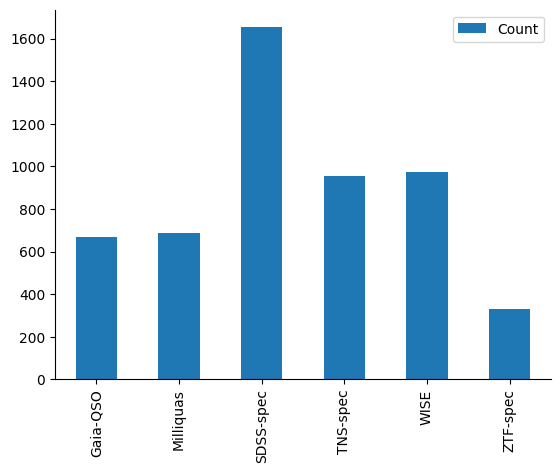

In [8]:
df = pd.DataFrame.from_dict(letter_counts, orient='index', columns=["Count"])
df.plot(kind='bar')
sns.despine()
plt.savefig("figures/class_origin.png", bbox_inches='tight')

In [9]:
letter_counts = Counter(sorted(agn["subclass"].tolist()))
letter_counts

Counter({'AGN': 4218, 'CCSN': 213, 'SN Ia': 708, 'TDE': 86, 'Varstar': 39})

([<matplotlib.patches.Wedge at 0x2890dcd00>,
 [Text(-0.8925352408895147, 0.6429469991922321, 'AGN (80.1)'),
  Text(0.372586812780659, -1.0349778098790092, 'Varstar (0.7)'),
  Text(0.571058959822245, -1.278237718269468, 'TDE (1.6)'),
  Text(0.6198326841212717, -0.9087394806516442, 'CCSN (4.0)'),
  Text(1.0032554762314152, -0.4510858559206623, 'SN Ia (13.4)')])

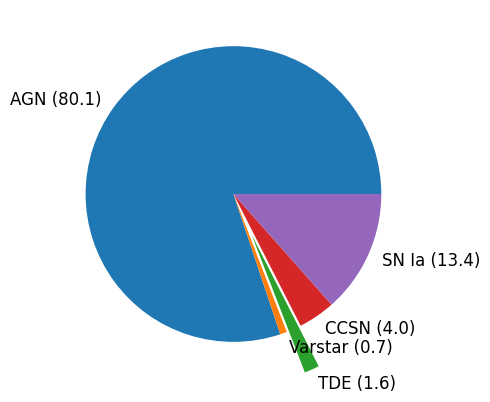

In [10]:
data = Counter(agn["subclass"].tolist())
plt.pie(
    [x for x in data.values()],
#     labels=[f"TDE \nN={data[0]} \n({100.*data[0]/np.sum(data):.1f}%)", f"Non-TDE\nN={data[1]}\n({100.*data[1]/np.sum(data):.1f}%)"],
    labels=[f"{x} ({100.*data[x] / len(agn):.1f})" for x in data.keys()],
#     colors=["orange", "grey", ],
#     autopct='%1.1f%%',
    explode=[0.3*(x == "TDE") for x in data.keys()],
    pctdistance=0.8,
    textprops={'size': 'larger'}
)

In [11]:
text_str = r"""\begin{table*}[]
        \begin{tabular}{c|c}
        \textbf{Class} & \textbf{Count}\\
        \hline
"""
print(text_str)

used_parameters = []

for i,row in letter_counts.items():
    if i != "TDE":
        print("\t " + f"{i} & {row} \\\\")
print("\t \hline")
print("\t " + f"TDE & {letter_counts['TDE']} \\\\")
print("\t \hline")
print("\t " + f"Total & {len(agn)} \\\\")
print(r"\end{tabular}")
print(r"\caption{Breakdown of the subclass for each sources in the final training sample.}")
print(r"""\label{tab:subclasses}
\end{table*}""")

\begin{table*}[]
        \begin{tabular}{c|c}
        \textbf{Class} & \textbf{Count}\\
        \hline

	 AGN & 4218 \\
	 CCSN & 213 \\
	 SN Ia & 708 \\
	 Varstar & 39 \\
	 \hline
	 TDE & 86 \\
	 \hline
	 Total & 5264 \\
\end{tabular}
\caption{Breakdown of the subclass for each sources in the final training sample.}
\label{tab:subclasses}
\end{table*}
